In [1]:
import pandas as pd
import seaborn as sns
from tensorflow.contrib.layers import real_valued_column
from tensorflow.contrib import learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Leitura dos dados de entrada.
data = pd.read_csv("dados_autent_bancaria.txt")

In [13]:
# Checando os dados de entrada...
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


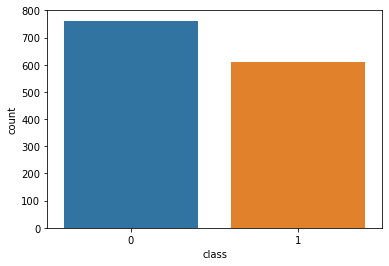

In [5]:
# Criando um gráfico de contagem para a coluna da classe.
sns.countplot(data['class'])

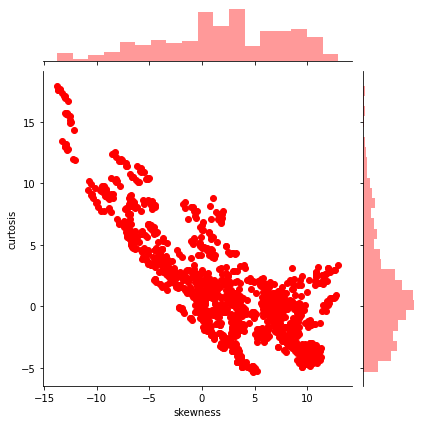

In [6]:
# Comparando Curtosis e Skewness.
sns.jointplot(data['skewness'],data['curtosis'],color='red')

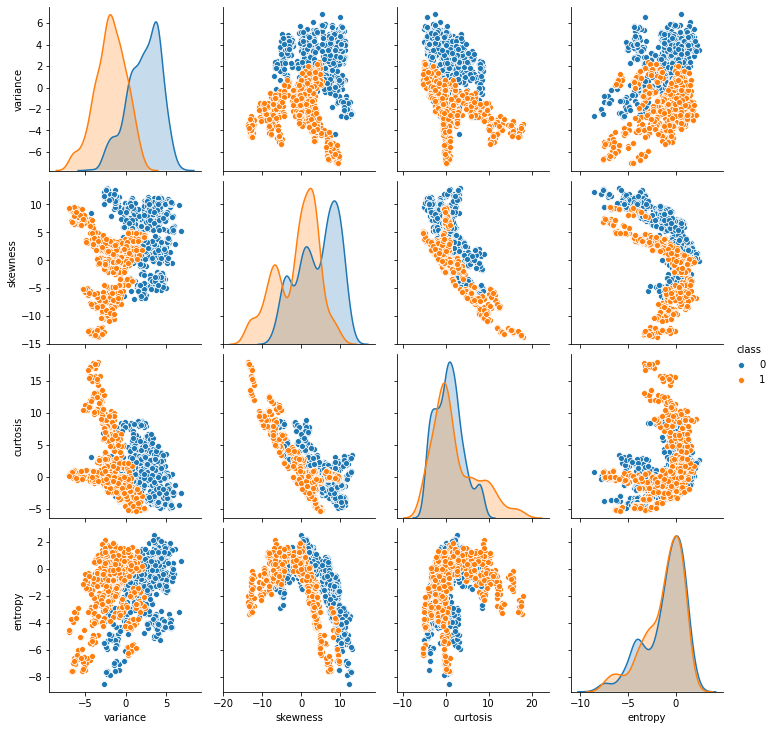

In [7]:
# Criando pares de gráficos para entender melhor os dados.
sns.pairplot(data,hue='class')

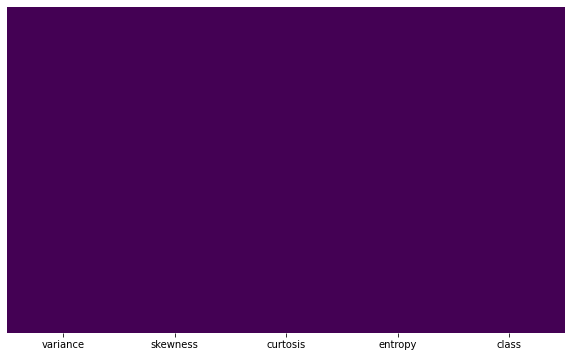

In [8]:
# Verificando valores nulos.
fig,axes=plt.subplots(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# Padronização dos dados para preparar para a etapa de treinamento.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('class', axis=1))
final_data = pd.DataFrame(data=scaled_data, columns=data.columns[:-1])
final_data.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [23]:
x = final_data.to_numpy()
y = data['class'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X)
print(y)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]
[0 0 0 ... 1 1 1]


In [25]:
# Create an object called classifier which is a DNNClassifier from learn. 
#Set it to have 2 classes and 
# a [10,20,10] hidden unit layer structure:
# and a feature coloumn
feature_columns = [real_valued_column("", dimension=4)]
classifier=learn.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feature_columns)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ad545eed9d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoint

In [ ]:
#fitting the data to our model and steps to be 200 and
#batch size to be 20
classifier.fit(X_train,y_train,steps=200,batch_size=20)

In [ ]:
#using the predict method to make prediction from our model
predictions=list(classifier.predict(X_test))

In [ ]:
#importing sklearn metrice library to evaluate the performance of our model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))

In [ ]:
print('Classfication Report \n',classification_report(y_test,predictions))

In [ ]:
print('Accuracy of our model -',accuracy_score(y_test,predictions))